In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

files=['/content/drive/MyDrive/SEM6miniproject/dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv','/content/drive/MyDrive/SEM6miniproject/dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv','/content/drive/MyDrive/SEM6miniproject/dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv','/content/drive/MyDrive/SEM6miniproject/dataset/Monday-WorkingHours.pcap_ISCX.csv','/content/drive/MyDrive/SEM6miniproject/dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv','/content/drive/MyDrive/SEM6miniproject/dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv','/content/drive/MyDrive/SEM6miniproject/dataset/Tuesday-WorkingHours.pcap_ISCX.csv','/content/drive/MyDrive/SEM6miniproject/dataset/Wednesday-workingHours.pcap_ISCX.csv']
dfs=[]
for file in files:
    df_temp = pd.read_csv(file)
    dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
df = df.drop(['Fwd Packets/s', ' Subflow Bwd Packets' ,' Total Backward Packets',
              ' Fwd IAT Min', ' Idle Max' ,' Flow IAT Min', ' Min Packet Length',
              'Bwd IAT Total', ' Fwd Packet Length Min' ,' Bwd IAT Min' ,' Bwd IAT Mean',
              ' Bwd IAT Std', ' Bwd IAT Max', ' Active Max', 'Active Mean',
              ' Down/Up Ratio', 'FIN Flag Count', ' URG Flag Count', ' Active Min',
              ' SYN Flag Count' ,' Idle Std', 'Fwd PSH Flags', ' Active Std',
              ' Fwd URG Flags', ' CWE Flag Count', ' RST Flag Count' ,' Fwd Header Length.1', 'Bwd Avg Bulk Rate',
              ' Bwd Avg Bytes/Bulk' ,' Fwd Avg Bulk Rate' ,' Fwd Avg Packets/Bulk',
              'Fwd Avg Bytes/Bulk' ,' Bwd PSH Flags' ,' Bwd URG Flags', ' ECE Flag Count',
              ' Bwd Avg Packets/Bulk'],axis= 1)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])

# Fill remaining NaN values if necessary (before scaling)
#df.fillna(df.mean(), inplace=True)

# Scaling numerical features (excluding 'Label')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=[' Label']))

# Creating DataFrame from scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=[' Label']).columns)

# Append the ' Label' column
df_scaled[' Label'] = df[' Label'].values

# Splitting dataset
X = df_scaled.drop(' Label', axis=1)
y = df_scaled[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting dataset
#X = df.drop(' Label', axis=1)
#y = df[' Label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Optional but highly recommended
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    tree_method = "hist", device = "cuda",
    n_estimators=69,
    max_depth=50,
    learning_rate=1.0,
    num_parallel_tree=69,
    subsample=0.8,
    colsample_bynode=0.8,
    random_state=42
)

model.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=69, n_jobs=None,
              num_parallel_tree=69, objective='multi:softprob', ...)

In [ ]:
#RandomForestClassifier Model
#rf_model = RandomForestClassifier(n_estimators=69,max_depth=50, random_state=42)
#rf_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Accuracy & Classification Report
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Classification Report:\n", report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:29:13] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.0564
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.07      0.12    454089
           1       0.00      1.00      0.00       386
           2       0.00      0.00      0.00     25588
           3       0.00      0.00      0.00      2055
           4       0.00      0.00      0.00     46259
           5       0.00      0.00      0.00      1103
           6       0.00      0.00      0.00      1146
           7       0.00      0.00      0.00      1570
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00     31712
          11       0.00      0.00      0.00      1242
          12       0.00      0.00      0.00       291
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00       122

    accuracy                           0.06    565576
   macro avg       0.03      0.07      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Get feature importance
importances = model.feature_importances_

# Create a pandas DataFrame to organize the feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)

# Display the feature importance ranking

print(feature_importance_df)

                         Feature  Importance
40                     Idle Mean    0.410106
22             Bwd Header Length    0.077016
39          min_seg_size_forward    0.058419
19                   Fwd IAT Std    0.054260
7          Fwd Packet Length Std    0.043430
41                      Idle Min    0.037493
28                PSH Flag Count    0.032152
9          Bwd Packet Length Min    0.028229
20                   Fwd IAT Max    0.028066
32          Avg Bwd Segment Size    0.023364
16                  Flow IAT Max    0.021786
31          Avg Fwd Segment Size    0.020089
18                  Fwd IAT Mean    0.020052
24             Max Packet Length    0.017173
23                 Bwd Packets/s    0.012670
11         Bwd Packet Length Std    0.012282
10        Bwd Packet Length Mean    0.012043
6         Fwd Packet Length Mean    0.011207
8          Bwd Packet Length Max    0.009711
14                 Flow IAT Mean    0.009573
36        Init_Win_bytes_forward    0.008585
37       I

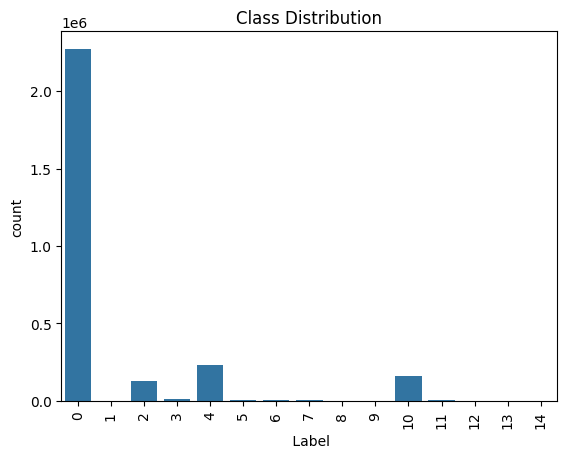

In [ ]:
import seaborn as sns

sns.countplot(data=df, x=' Label')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.show()

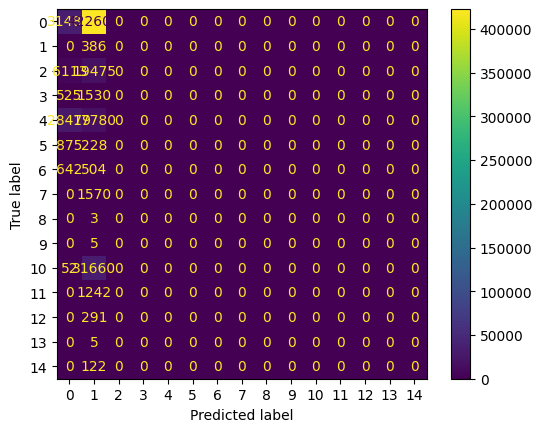

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [ ]:
print("Label:",label_encoder.inverse_transform(np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])))

Label: ['BENIGN' 'Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest'
 'DoS slowloris' 'FTP-Patator' 'Heartbleed' 'Infiltration' 'PortScan'
 'SSH-Patator' 'Web Attack � Brute Force' 'Web Attack � Sql Injection'
 'Web Attack � XSS']


In [ ]:
import pickle
with open('idsMODEL.pkl', 'wb') as file:
    pickle.dump(model,file)

In [ ]:
with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

<Axes: >

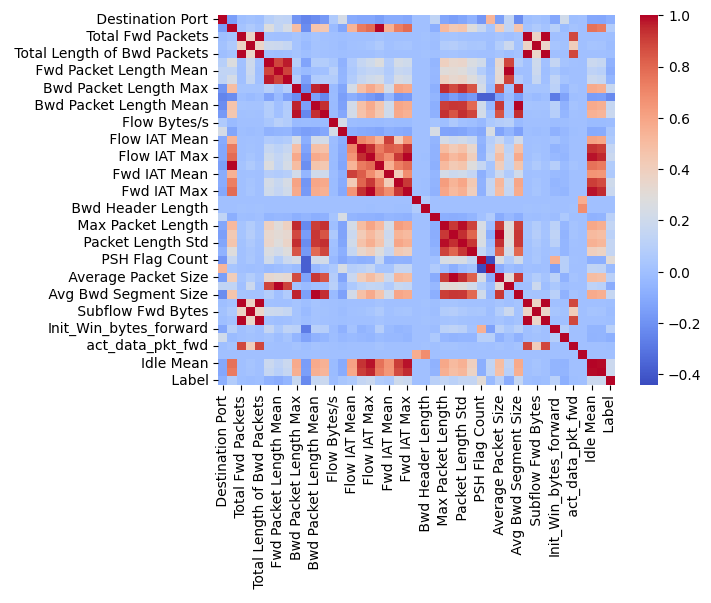

In [ ]:
corr = df_scaled.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)